In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np

from fpl_data_retrieval import get_fpl_data, get_current_gameweek
from basic_set_and_forget_optimisation import simulate_model_team

In [53]:
year = '2023-2024'
team_df = pd.read_csv('optimal_teams/set_and_forget_' + year + '.csv')
display(team_df)

,id,web_name,positions,now_cost,start_cost,short_name,total_points,gw_1_points,gw_1_minutes,gw_2_points,...,gw_36_points,gw_36_minutes,gw_37_points,gw_37_minutes,gw_38_points,gw_38_minutes,in_lineup,on_bench,is_captain,is_vice_captain
0,263,Pickford,GK,48,45,EVE,153,2,90,0,...,3,90,8,90,1,90,True,False,False,True
1,20,Saliba,DEF,59,50,ARS,164,5,90,8,...,6,90,9,90,2,90,True,False,False,False
2,29,White,DEF,61,55,ARS,182,1,90,7,...,6,90,6,90,2,68,True,False,False,False
3,506,Pedro Porro,DEF,59,50,TOT,136,0,0,6,...,0,90,10,180,14,75,True,False,False,False
4,362,Palmer,MID,63,50,CHE,244,1,10,0,...,8,88,14,180,6,88,True,False,True,False
5,353,Foden,MID,85,75,MCI,230,3,90,9,...,5,79,11,171,15,90,True,False,False,False
6,412,Gordon,MID,64,55,NEW,183,4,67,0,...,6,84,8,180,0,0,True,False,False,False
7,516,Son,MID,100,90,TOT,213,2,74,3,...,7,90,4,180,7,87,True,False,False,False
8,19,Saka,MID,88,85,ARS,226,10,90,3,...,10,85,2,81,0,0,True,False,False,False
9,60,Watkins,FWD,89,80,AVL,228,5,90,5,...,2,90,5,90,2,68,True,False,False,False


In [54]:
simulated_team_season = simulate_model_team(team_df)
print(simulated_team_season)

[{1: {'points': 48, 'subs_made': [{'sub_out': 506, 'sub_in': 616}], 'did_captain_play': True, 'vice_play_in_captains_place': False}}, {2: {'points': 48, 'subs_made': [{'sub_out': 362, 'sub_in': 85}], 'did_captain_play': False, 'vice_play_in_captains_place': True}}, {3: {'points': 47, 'subs_made': [{'sub_out': 362, 'sub_in': 245}], 'did_captain_play': False, 'vice_play_in_captains_place': True}}, {4: {'points': 63, 'subs_made': [], 'did_captain_play': True, 'vice_play_in_captains_place': False}}, {5: {'points': 46, 'subs_made': [], 'did_captain_play': True, 'vice_play_in_captains_place': False}}, {6: {'points': 75, 'subs_made': [], 'did_captain_play': True, 'vice_play_in_captains_place': False}}, {7: {'points': 86, 'subs_made': [], 'did_captain_play': True, 'vice_play_in_captains_place': False}}, {8: {'points': 74, 'subs_made': [{'sub_out': 412, 'sub_in': 245}, {'sub_out': 19, 'sub_in': 85}], 'did_captain_play': True, 'vice_play_in_captains_place': False}}, {9: {'points': 69, 'subs_made

In [55]:
def convert_history_to_df(df, history):
    current_gw = get_current_gameweek(get_fpl_data())
    history_df = df.copy()

    for i in range(1, current_gw + 1):
        history_df['gw_' + str(i) + '_in_team'] = False

    for gameweek_info in history:
        base_lineup = history_df[history_df['in_lineup'] == True]['id'].tolist()
        for gw, info in gameweek_info.items():
            subs_made = info.get('subs_made', [])
        
            for sub in subs_made:
                sub_out = sub['sub_out']
                sub_in = sub['sub_in']
                
                if df[(df['id'] == sub_in)][f'gw_{gw}_minutes'].iloc[0] > 0:
                    base_lineup.remove(sub_out)
                    base_lineup.append(sub_in)
            
            history_df.loc[history_df['id'].isin(base_lineup), 'gw_' + str(gw) + '_in_team'] = True

    return history_df

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    engineered_df = convert_history_to_df(team_df, simulated_team_season)       
    display(engineered_df)

,id,web_name,positions,now_cost,start_cost,short_name,total_points,gw_1_points,gw_1_minutes,gw_2_points,gw_2_minutes,gw_3_points,gw_3_minutes,gw_4_points,gw_4_minutes,gw_5_points,gw_5_minutes,gw_6_points,gw_6_minutes,gw_7_points,gw_7_minutes,gw_8_points,gw_8_minutes,gw_9_points,gw_9_minutes,gw_10_points,gw_10_minutes,gw_11_points,gw_11_minutes,gw_12_points,gw_12_minutes,gw_13_points,gw_13_minutes,gw_14_points,gw_14_minutes,gw_15_points,gw_15_minutes,gw_16_points,gw_16_minutes,gw_17_points,gw_17_minutes,gw_18_points,gw_18_minutes,gw_19_points,gw_19_minutes,gw_20_points,gw_20_minutes,gw_21_points,gw_21_minutes,gw_22_points,gw_22_minutes,gw_23_points,gw_23_minutes,gw_24_points,gw_24_minutes,gw_25_points,gw_25_minutes,gw_26_points,gw_26_minutes,gw_27_points,gw_27_minutes,gw_28_points,gw_28_minutes,gw_29_points,gw_29_minutes,gw_30_points,gw_30_minutes,gw_31_points,gw_31_minutes,gw_32_points,gw_32_minutes,gw_33_points,gw_33_minutes,gw_34_points,gw_34_minutes,gw_35_points,gw_35_minutes,gw_36_points,gw_36_minutes,gw_37_points,gw_37_minutes,gw_38_points,gw_38_minutes,in_lineup,on_bench,is_captain,is_vice_captain,gw_1_in_team,gw_2_in_team,gw_3_in_team,gw_4_in_team,gw_5_in_team,gw_6_in_team,gw_7_in_team,gw_8_in_team,gw_9_in_team,gw_10_in_team,gw_11_in_team,gw_12_in_team,gw_13_in_team,gw_14_in_team,gw_15_in_team,gw_16_in_team,gw_17_in_team,gw_18_in_team,gw_19_in_team,gw_20_in_team,gw_21_in_team,gw_22_in_team,gw_23_in_team,gw_24_in_team,gw_25_in_team,gw_26_in_team,gw_27_in_team,gw_28_in_team,gw_29_in_team,gw_30_in_team,gw_31_in_team,gw_32_in_team,gw_33_in_team,gw_34_in_team,gw_35_in_team,gw_36_in_team,gw_37_in_team,gw_38_in_team
0,263,Pickford,GK,48,45,EVE,153,2,90,0,90,2,90,1,90,3,90,2,90,1,90,9,90,2,90,5,90,2,90,2,90,1,90,7,90,7,90,10,90,6,90,2,90,2,90,2,90,9,90,10,90,2,90,1,90,3,90,4,90,0,90,3,90,0,0,2,90,3,90,8,90,0,90,18,180,10,90,3,90,8,90,1,90,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
1,20,Saliba,DEF,59,50,ARS,164,5,90,8,90,1,90,2,90,6,90,1,90,6,90,7,90,1,90,7,90,2,90,9,90,6,90,1,90,1,90,2,90,7,90,2,90,1,90,0,90,6,90,2,90,1,90,12,90,6,90,2,90,6,90,2,90,0,0,7,90,7,90,5,90,1,90,14,180,1,90,6,90,9,90,2,90,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,29,White,DEF,61,55,ARS,182,1,90,7,90,1,90,2,90,7,90,4,90,14,90,9,90,0,90,6,65,2,72,0,0,1,1,1,11,4,90,2,90,5,90,1,90,1,90,1,66,6,90,2,90,1,90,9,76,6,68,2,90,13,64,11,90,0,0,6,90,6,90,5,90,5,66,26,180,1,90,6,90,6,90,2,68,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,506,Pedro Porro,DEF,59,50,TOT,136,0,0,6,87,6,90,4,90,2,90,1,90,7,90,6,90,6,90,2,90,0,90,5,90,5,90,0,90,5,90,5,90,8,90,2,90,5,90,2,90,6,90,1,90,1,90,2,90,0,0,0,0,0,0,7,90,1,90,2,90,2,90,11,90,0,48,0,0,2,180,0,90,10,180,14,75,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True
4,362,Palmer,MID,63,50,CHE,244,1,10,0,0,0,0,1,28,1,27,1,22,5,77,12,85,6,83,2,90,12,90,6,90,2,74,1,24,8,90,1,90,14,90,1,90,0,0,18,90,10,90,2,84,8,90,10,90,2,70,0,0,5,90,13,85,0,0,15,90,20,90,5,73,26,79,0,0,8,180,8,88,14,180,6,88,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True
5,353,Foden,MID,85,75,MCI,230,3,90,9,90,4,4,5,89,2,66,11,86,2,90,2,90,2,90,7,90,6,45,2,90,2,90,9,72,3,72,2,90,5,90,0,0,8,90,12,90,2,90,6,76,20,90,3,90,5,180,1

ValueError: Axis limits cannot be NaN or Inf

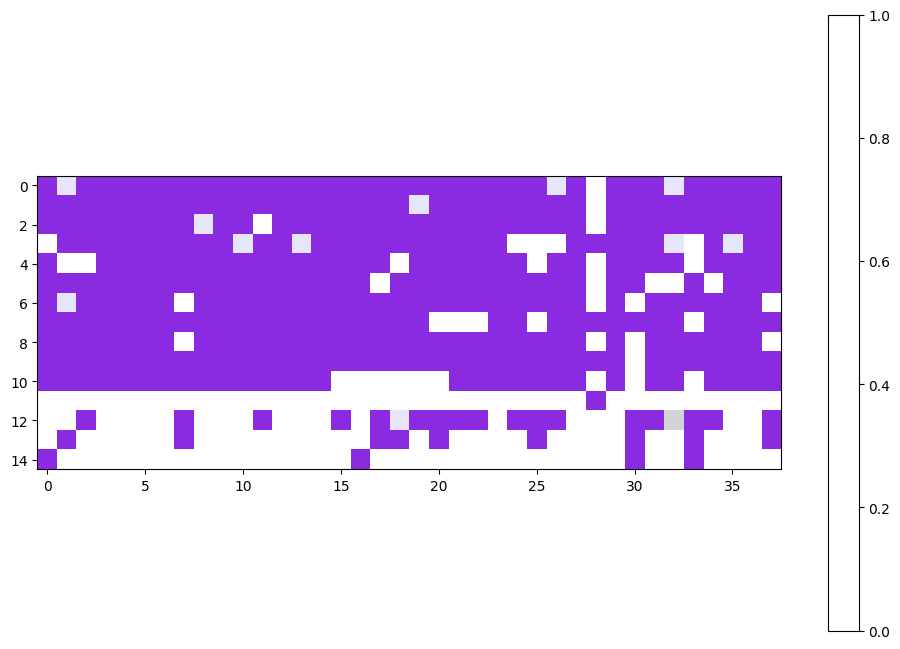

In [60]:
from matplotlib.colors import ListedColormap, BoundaryNorm
def add_captaincy_vice_captaincy_to_web_name(df):
    """
    Adds the captaincy and vice captaincy to the web_name column

    Args:
        df (pd.DataFrame): The dataframe to add the captaincy and vice captaincy to.

    Returns:
        pd.DataFrame: The dataframe with the captaincy and vice captaincy added to the web_name column.
    """
    # If the row is true for 'is_captain' append (C) to the web_name, if true for 'is_vice_captain' append (VC) to the web_name.
    df['web_name'] = df.apply(lambda row: row['web_name'] + ' (C)' if row['is_captain'] else row['web_name'], axis=1)
    df['web_name'] = df.apply(lambda row: row['web_name'] + ' (VC)' if row['is_vice_captain'] else row['web_name'], axis=1)
    return df

def get_point_range(df):
    """
    Gets the min and max of points in a single gameweek

    Args:
        df (pd.DataFrame): The dataframe to get the point range from.

    Returns:
        tuple: The min and max of points in a single gameweek
    """
    # Get the min and max of points across all game weeks
    for i in range(1, get_current_gameweek(get_fpl_data()) + 1):
        if i == 1:
            min_points = df[f'gw_{i}_points'].min()
            max_points = df[f'gw_{i}_points'].max()
        else:
            min_points = min(min_points, df[f'gw_{i}_points'].min())
            max_points = max(max_points, df[f'gw_{i}_points'].max())
    return min_points, max_points


def visualise_player_point_breakdown(df):
    pass


In [57]:
def convert_history_to_df(df, history):
    current_gw = get_current_gameweek(get_fpl_data())
    history_df = df.copy()

    for i in range(1, current_gw + 1):
        history_df['gw_' + str(i) + '_in_team'] = False

    for gameweek_info in history:
        base_lineup = history_df[history_df['in_lineup'] == True]['id'].tolist()
        for gw, info in gameweek_info.items():
            subs_made = info.get('subs_made', [])
        
            for sub in subs_made:
                sub_out = sub['sub_out']
                sub_in = sub['sub_in']
                
                if df[(df['id'] == sub_in)][f'gw_{gw}_minutes'].iloc[0] > 0:
                    base_lineup.remove(sub_out)
                    base_lineup.append(sub_in)
            
            history_df.loc[history_df['id'].isin(base_lineup), 'gw_' + str(gw) + '_in_team'] = True

    return history_df

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    engineered_df = convert_history_to_df(team_df, simulated_team_season)       
    display(engineered_df)

,id,web_name,positions,now_cost,start_cost,short_name,total_points,gw_1_points,gw_1_minutes,gw_2_points,gw_2_minutes,gw_3_points,gw_3_minutes,gw_4_points,gw_4_minutes,gw_5_points,gw_5_minutes,gw_6_points,gw_6_minutes,gw_7_points,gw_7_minutes,gw_8_points,gw_8_minutes,gw_9_points,gw_9_minutes,gw_10_points,gw_10_minutes,gw_11_points,gw_11_minutes,gw_12_points,gw_12_minutes,gw_13_points,gw_13_minutes,gw_14_points,gw_14_minutes,gw_15_points,gw_15_minutes,gw_16_points,gw_16_minutes,gw_17_points,gw_17_minutes,gw_18_points,gw_18_minutes,gw_19_points,gw_19_minutes,gw_20_points,gw_20_minutes,gw_21_points,gw_21_minutes,gw_22_points,gw_22_minutes,gw_23_points,gw_23_minutes,gw_24_points,gw_24_minutes,gw_25_points,gw_25_minutes,gw_26_points,gw_26_minutes,gw_27_points,gw_27_minutes,gw_28_points,gw_28_minutes,gw_29_points,gw_29_minutes,gw_30_points,gw_30_minutes,gw_31_points,gw_31_minutes,gw_32_points,gw_32_minutes,gw_33_points,gw_33_minutes,gw_34_points,gw_34_minutes,gw_35_points,gw_35_minutes,gw_36_points,gw_36_minutes,gw_37_points,gw_37_minutes,gw_38_points,gw_38_minutes,in_lineup,on_bench,is_captain,is_vice_captain,gw_1_in_team,gw_2_in_team,gw_3_in_team,gw_4_in_team,gw_5_in_team,gw_6_in_team,gw_7_in_team,gw_8_in_team,gw_9_in_team,gw_10_in_team,gw_11_in_team,gw_12_in_team,gw_13_in_team,gw_14_in_team,gw_15_in_team,gw_16_in_team,gw_17_in_team,gw_18_in_team,gw_19_in_team,gw_20_in_team,gw_21_in_team,gw_22_in_team,gw_23_in_team,gw_24_in_team,gw_25_in_team,gw_26_in_team,gw_27_in_team,gw_28_in_team,gw_29_in_team,gw_30_in_team,gw_31_in_team,gw_32_in_team,gw_33_in_team,gw_34_in_team,gw_35_in_team,gw_36_in_team,gw_37_in_team,gw_38_in_team
0,263,Pickford,GK,48,45,EVE,153,2,90,0,90,2,90,1,90,3,90,2,90,1,90,9,90,2,90,5,90,2,90,2,90,1,90,7,90,7,90,10,90,6,90,2,90,2,90,2,90,9,90,10,90,2,90,1,90,3,90,4,90,0,90,3,90,0,0,2,90,3,90,8,90,0,90,18,180,10,90,3,90,8,90,1,90,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True
1,20,Saliba,DEF,59,50,ARS,164,5,90,8,90,1,90,2,90,6,90,1,90,6,90,7,90,1,90,7,90,2,90,9,90,6,90,1,90,1,90,2,90,7,90,2,90,1,90,0,90,6,90,2,90,1,90,12,90,6,90,2,90,6,90,2,90,0,0,7,90,7,90,5,90,1,90,14,180,1,90,6,90,9,90,2,90,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,29,White,DEF,61,55,ARS,182,1,90,7,90,1,90,2,90,7,90,4,90,14,90,9,90,0,90,6,65,2,72,0,0,1,1,1,11,4,90,2,90,5,90,1,90,1,90,1,66,6,90,2,90,1,90,9,76,6,68,2,90,13,64,11,90,0,0,6,90,6,90,5,90,5,66,26,180,1,90,6,90,6,90,2,68,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,506,Pedro Porro,DEF,59,50,TOT,136,0,0,6,87,6,90,4,90,2,90,1,90,7,90,6,90,6,90,2,90,0,90,5,90,5,90,0,90,5,90,5,90,8,90,2,90,5,90,2,90,6,90,1,90,1,90,2,90,0,0,0,0,0,0,7,90,1,90,2,90,2,90,11,90,0,48,0,0,2,180,0,90,10,180,14,75,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True
4,362,Palmer,MID,63,50,CHE,244,1,10,0,0,0,0,1,28,1,27,1,22,5,77,12,85,6,83,2,90,12,90,6,90,2,74,1,24,8,90,1,90,14,90,1,90,0,0,18,90,10,90,2,84,8,90,10,90,2,70,0,0,5,90,13,85,0,0,15,90,20,90,5,73,26,79,0,0,8,180,8,88,14,180,6,88,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True
5,353,Foden,MID,85,75,MCI,230,3,90,9,90,4,4,5,89,2,66,11,86,2,90,2,90,2,90,7,90,6,45,2,90,2,90,9,72,3,72,2,90,5,90,0,0,8,90,12,90,2,90,6,76,20,90,3,90,5,180,1